# Linear Regression:

In [1]:
#important library
import numpy as np
import matplotlib.pyplot as plt

### What we will do throughout the exercise:
We will write in details before any exercise. So just go ahead. <br />
Almost every exercise is done (Graded and ungraded both) but surface plot of cost function and features. Till now, I have not understood the practical use of that. 

## 1. WarmUpExercise.m:

In [2]:
A=np.identity(5)             # Just kidding!!!

## 2. Linear Regression with One Variable
### 2.1 Plotting Data:
Before starting any fitting model, it's really good to visualize data a little bit.

In [3]:
# Load ex1data1.txt
x,y=np.loadtxt('/home/suvranil/Dropbox/andrew_ng_python/ex1/ex1data1.txt',dtype= float,delimiter=',',skiprows=0,unpack=True)

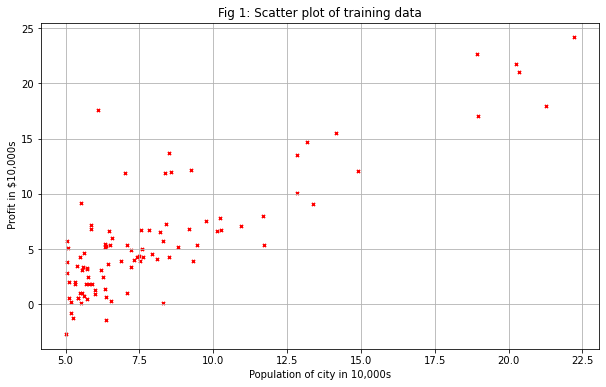

In [4]:
#Plotting data: 
plt.figure(figsize=(10,6))
plt.scatter(x,y,label='node_50',color='r',marker='x',s=10)
plt.xlabel('Population of city in 10,000s')
plt.ylabel(' Profit in $10,000s')
plt.title('Fig 1: Scatter plot of training data',)
plt.grid(True)
plt.show()

### 2.2 Gradient Descent:
Now before proceeding, just make one thing clear.We can easily do linear regression with one variable. But with multiple variables, it is too much time consuming. So we will try to vectorize the problem. There is a note matrix form of our known 'single' equation. Check it. <br />

And **a little advice:** Before using any matrix equation, first check order of all matrices.

## Matrix form of all important equation: 

![Fig 02: Matrix form of all important equation](matrix_equation.jpg)

In [5]:
#Important Data:m is number of traing example and n is number of features
x_matrix=(np.matrix(np.vstack((np.ones(len(x)),x))))    # matrix of order (n+1)*m. Here n=1
y_matrix=np.matrix(y)                                   # matrix of order 1*m
initial_theta_matrix=np.matrix(np.zeros(x_matrix.shape[0])).T   # matrix of order (n+1)*1

#### 2.2.1 Compute cost function:

In [6]:
def computecost(X,theta_matrix,Y): # check equation of cost function from notebook image
    difference=np.dot(theta_matrix.T,X)-Y
    cost=(1/(2*Y.shape[1]))*(np.dot(difference,difference.T))      # Y.shape[1] is number of training example
    return cost

In [7]:
#just checking whether cost function is working
cost=computecost(x_matrix,initial_theta_matrix,y_matrix)     # calculate cost function for intial theta
print(cost) 

[[32.07273388]]


#### 2.2.2 Gradient descent function:

In [8]:
# Though we do use gradient descent for appropriate theta value only, we are storing cost function...
# (after previous line) for seeing whether cost function is converging or not.
def gradient_descent(learning_rate,iteration,theta_matrix,X,Y): # check equation of gradient descent from notebook image
    cost_array=np.zeros(iteration)
    for i in range(0,iteration,1):
        difference=np.dot(theta_matrix.T,X)-Y
        factor=learning_rate/Y.shape[1]            #Y.shape[1] is total number of training example
        theta_matrix=theta_matrix-factor*np.matmul(X,difference.T)    
        cost_array[i]=computecost(X,theta_matrix,Y)     # we will plot it to show that it converges with iteration
    return cost_array,theta_matrix   

In [9]:
#initialization
alpha=0.01          #learning rate
iterations=1500     # Number of iteration   

In [10]:
#Find appropriate theta_value
cost,final_theta_matrix=gradient_descent(alpha,iterations,initial_theta_matrix,x_matrix,y_matrix)

### Plot cost function to ensure correctness:

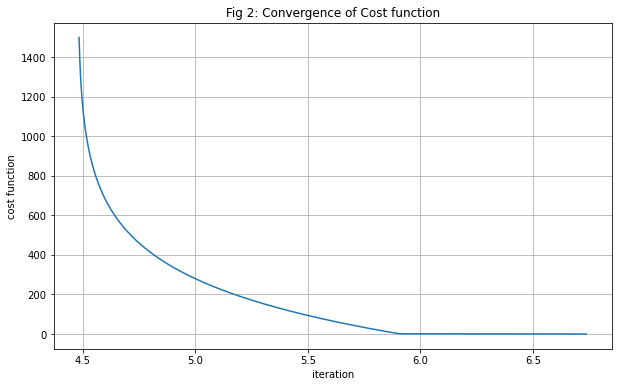

In [11]:
# plot convergence of cost function
plt.figure(figsize=(10,6))
plt.plot(cost,np.arange(0,iterations,1))
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.title('Fig 2: Convergence of Cost function')
plt.grid(True)
plt.show()

### Plot Linear regression fit data with traing data:

In [12]:
def linear_regression_fit(theta_matrix,X):
    return np.dot(theta_matrix.T,X)

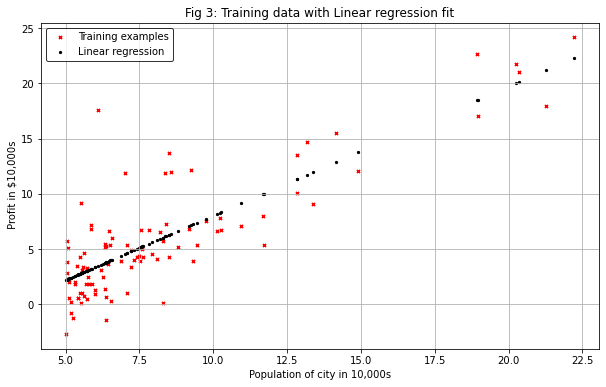

In [13]:
#Training data with linear regression fit
plt.figure(figsize=(10,6))
fit_data=linear_regression_fit(final_theta_matrix,x_matrix).tolist()
plt.scatter(x,y,color='r',marker='x',s=10,label='Training examples')
plt.scatter(x,fit_data,color='k',s=5,label='Linear regression')
plt.xlabel('Population of city in 10,000s')
plt.ylabel(' Profit in $10,000s')
plt.title('Fig 3: Training data with Linear regression fit')
plt.legend(edgecolor='black')
plt.grid(True)

## 3. Linear regression with multiple variables
### 3.1 Visualization of given data:

In [14]:
# Load ex1data2.txt
x_size,x_bedroom,y_price=np.loadtxt('/home/suvranil/Dropbox/andrew_ng_python/ex1/ex1data2.txt',dtype= float,delimiter=',',skiprows=0,unpack=True)

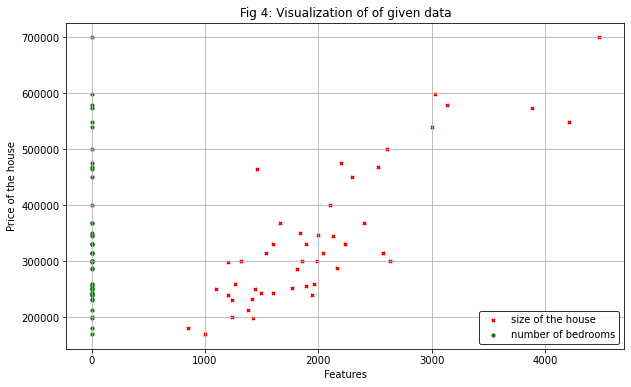

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x_size,y_price,label='size of the house',color='r',marker='x',s=10)
plt.scatter(x_bedroom,y_price,label='number of bedrooms',color='g',marker='o',s=10)
plt.xlabel('Features')
plt.ylabel('Price of the house')
plt.title('Fig 4: Visualization of of given data')
plt.legend(edgecolor='black')
plt.grid(True)

From the above figure, we can easily understand that we need **Feature scaling** here.

### 3.2 Feature scaling:

In [16]:
x_size_new=(x_size-(np.mean(x_size)))/(np.std(x_size))      

In [17]:
x_bedroom_new=(x_bedroom-(np.mean(x_bedroom)))/(np.std(x_bedroom))

#### 3.3 Visualization of data after feature scaling:

Text(-3, 600000, 'value of any feature lies between 3 and -3')

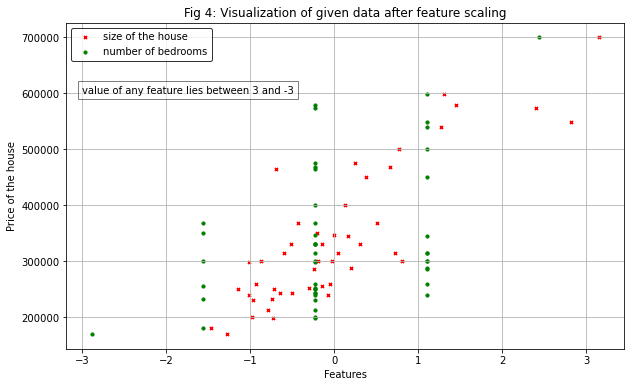

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(x_size_new,y_price,label='size of the house',color='r',marker='x',s=10)
plt.scatter(x_bedroom_new,y_price,label='number of bedrooms',color='g',marker='o',s=10)
plt.xlabel('Features')
plt.ylabel('Price of the house')
plt.title('Fig 4: Visualization of given data after feature scaling')
plt.legend(edgecolor='black')
plt.grid(True)
plt.text(-3,600000,'value of any feature lies between 3 and -3', bbox=dict(facecolor='white', alpha=0.5))

## 3.4 Gradient Descent:

In [19]:
x_matrix=np.matrix([np.ones(len(x_size_new)),x_size_new,x_bedroom_new])
y_matrix=np.matrix(y_price)
initial_theta_matrix=np.matrix(np.zeros(x_matrix.shape[0])).T   # matrix of order (n+1)*1

### 3.4.1 Compute cost function:

In [20]:
def computecost(X,theta_matrix,Y):
    difference=np.dot(theta_matrix.T,X)-Y
    cost=(1/(2*Y.shape[1]))*(np.dot(difference,difference.T))      # Y.shape[1] is number of training example
    return cost

In [21]:
def gradient_descent(learning_rate,iteration,theta_matrix,X,Y):
    cost_array=np.zeros(iteration)
    for i in range(0,iteration,1):
        difference=np.dot(theta_matrix.T,X)-Y
        factor=learning_rate/Y.shape[1]            #Y.shape[1] is total number of training example
        theta_matrix=theta_matrix-factor*np.matmul(X,difference.T)    
        cost_array[i]=computecost(X,theta_matrix,Y)     # we will plot it to show that it converges with iteration
    return cost_array,theta_matrix   

In [22]:
#initialization
alpha=0.01
iterations=10000      

In [23]:
# Find appropriate theta_value
cost,final_theta_matrix=gradient_descent(alpha,iterations,initial_theta_matrix,x_matrix,y_matrix)

### Plot cost function to ensure correctness:

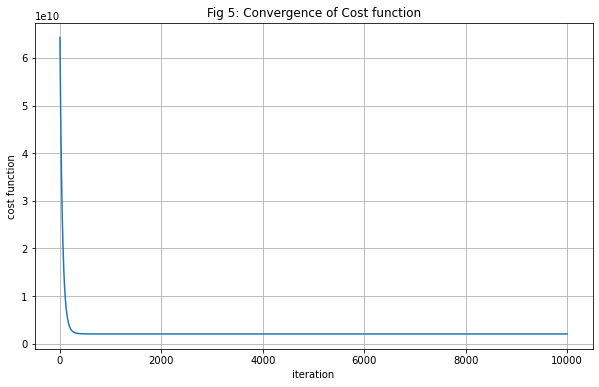

In [24]:
# plot convergence of cost function
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,iterations,1),cost)
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.title('Fig 5: Convergence of Cost function')
plt.grid(True)

### 3.4.2 Selecting learning rate:
It is pretty important to find a 'suitable' learning rate. So a just thumb rule is: Start from 0.001 and go ahead multiplying 3 and keep checking (For that plot cost function vs iteration plot).

In [25]:
iterations=100
alpha=[0.001,0.003,0.01]
cost_box=np.matrix(np.zeros((len(alpha),iterations)))
for i in range (0,len(alpha),1):
    cost,theta=gradient_descent(alpha[i],iterations,initial_theta_matrix,x_matrix,y_matrix)
    cost_box[i]= cost  

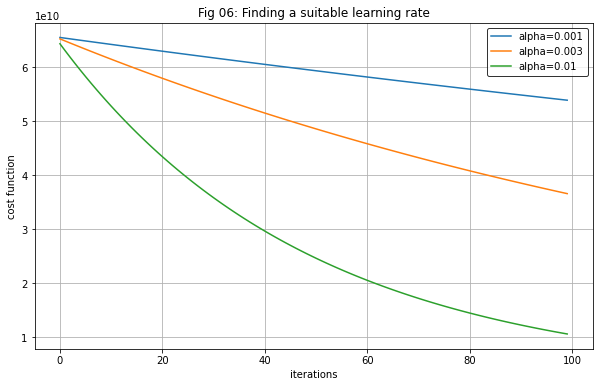

In [26]:
# plot convergence of cost function
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,iterations,1),np.ravel(cost_box[0]),label='alpha=0.001')
plt.plot(np.arange(0,iterations,1),np.ravel(cost_box[1]),label='alpha=0.003')
plt.plot(np.arange(0,iterations,1),np.ravel(cost_box[2]),label='alpha=0.01')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.title('Fig 06: Finding a suitable learning rate')
plt.legend(edgecolor='black')
plt.grid(True)

## **Cheers!!!! First hardle is done.** 